In [1]:
__author__ = "Guillermo Damke <gdamke@gmail.com>"
__version__ = 20201217

# Astroquery: Accessing online data with Astropy

"**Astroquery** is an Astropy affiliated package that contains a collection of tools to access online Astronomical data. **Each web service has its own sub-package.**"


### Installing Astropy:

To install Astropy, just run:

`conda install -c astropy astroquery`

Or, if using pip:

`pip install astroquery`

More details about Astroquery can be found at their website (for example, installing the "bleeding edge" version):

https://www.astropy.org/astroquery/

The following submodules are available in astroquery:

* ALMA Queries (astroquery.alma)
* Atomic Line List (astroquery.atomic)
* Besancon Queries (astroquery.besancon)
* Cadc (astroquery.cadc)
* CASDA Queries (astroquery.casda)
* CDS MOC Service (astroquery.cds)
* esa.hubble (astroquery.esa.hubble)
* ESASky Queries (astroquery.esasky)
* ESO Queries (astroquery.eso)
* Gaia TAP+ (astroquery.gaia)
* GAMA Queries (astroquery.gama)
* Gemini Queries (astroquery.gemini)
* HEASARC Queries (astroquery.heasarc)
* HITRAN Queries (astroquery.hitran)
* IRSA Image Server program interface (IBE) Queries (astroquery.ibe)
* IRSA Queries (astroquery.irsa)
* IRSA Dust Extinction Service Queries (astroquery.irsa_dust)
* JPL Spectroscopy Queries (astroquery.jplspec)
* MAGPIS Queries (astroquery.magpis)
* MAST Queries (astroquery.mast)
* Minor Planet Center Queries (astroquery.mpc/astroquery.solarsystem.MPC)
* NASA ADS Queries (astroquery.nasa_ads)
* NED Queries (astroquery.ned)
* NIST Queries (astroquery.nist)
* NOIRLab Queries (astroquery.noirlab)
* NRAO Queries (astroquery.nrao)
* NVAS Queries (astroquery.nvas)
* SIMBAD Queries (astroquery.simbad)
* Skyview Queries (astroquery.skyview)
* Splatalogue Queries (astroquery.splatalogue)
* SVO Filter Profile Service Queries (astroquery.svo_fps)
* UKIDSS Queries (astroquery.ukidss)
* Vamdc Queries (astroquery.vamdc)
* VizieR Queries (astroquery.vizier)
* VO Simple Cone Search (astroquery.vo_conesearch)
* VSA Queries (astroquery.vsa)
* xMatch Queries (astroquery.xmatch)
* DACE (astroquery.dace)
* xmm_newton (astroquery.esa.xmm_newton)


Which are described as:

 * Simbad: Basic data, cross-identifications, bibliography and measurements for astronomical objects outside the solar system.
 * Vizier: Set of 11,000+ published, multiwavelength catalogues hosted by the CDS.
 * ESASky: ESASky is a science driven discovery portal providing easy visualizations and full access to the entire sky as observed with ESA Space astronomy missions.
 * IRSA Image Server program interface (IBE) Query Tool: provides access to the 2MASS, WISE, and PTF image archives.
 * IRSA dust: Galactic dust reddening and extinction maps from IRAS 100 um data.
 * NED: NASA/IPAC Extragalactic Database. Multiwavelength data from both surveys and publications.
 * IRSA: NASA/IPAC Infrared Science Archive. Science products for all of NASA's infrared and sub-mm missions.
 * UKIDSS: UKIRT Infrared Deep Sky Survey. JHK images of 7500 sq deg. in the northern sky.
 * MAGPIS: Multi-Array Galactic Plane Imaging Survey. 6 and 20-cm radio images of the Galactic plane from the VLA.
 * NRAO: Science data archive of the National Radio Astronomy Observatory. VLA, JVLA, VLBA and GBT data products.
 * Besancon: Model of stellar population synthesis in the Galaxy.
 * NIST: National Institute of Standards and Technology (NIST) atomic lines database.
 * Fermi: Fermi gamma-ray telescope archive.
 * SDSS: Sloan Digital Sky Survey data, including optical images, spectra, and spectral templates.
 * Alfalfa: Arecibo Legacy Fast ALFA survey; extragalactic HI radio data.
 * SHA: Spitzer Heritage Archive; infrared data products from the Spitzer Space Telescope
 * Lamda: Leiden Atomic and Molecular Database; energy levels, radiative transitions, and collisional rates for astrophysically relevant atoms and molecules.
 * Ogle: Optical Gravitational Lensing Experiment III; information on interstellar extinction towards the Galactic bulge.
 * Splatalogue: National Radio Astronomy Observatory (NRAO)-maintained (mostly) molecular radio and millimeter line list service.
 * CosmoSim: The CosmoSim database provides results from cosmological simulations performed within different projects: the MultiDark project, the BolshoiP project, and the CLUES project.
 * ESO Archive
 * ALMA Archive
 * GAMA database
 * NVAS archive
 * Open Expolanet Catalog (OEC)

### Astroquery API specification

The `astroquery` module by itself is not very useful. To query a given service, the user has to import the respective submodule. However, all submodules follow the same API design. We will review it first (information below taken from https://astroquery.readthedocs.io/en/latest/api.html):


The query tools will be implemented as class methods, so that the standard approach for a given web service (e.g., IRSA, UKIDSS, SIMBAD) will be

`from astroquery.service import Service`

`result = Service.query_object('M 31')`

for services that do not require login.

On the other side, if services require a login, then do:

`from astroquery.service import Service`

`S = Service(user='username',password='password')`

`result = S.query_object('M 31')`



### API Query Methods

The classes from above will have the following methods where appropriate:

* `query_object(objectname, ...)`

* `query_region(coordinate, radius=, width=)`

* `get_images(coordinate)`

They may also have other methods for querying non-standard data types (e.g., ADS queries that may return a bibtex text block).


#### `query_object`

`query_object` is only needed for services that are capable of parsing an object name (e.g., SIMBAD, Vizier, NED), otherwise `query_region` is an adequate approach, as any name can be converted to a coordinate via the SIMBAD name parser.

#### `query_region`

Query a region around a coordinate.

One of these keywords must be specified (no default is assumed):

radius - an astropy Quantity object, or a string that can be parsed into one.
        e.g., '1 degree' or 1*u.degree.
        If radius is specified, the shape is assumed to be a circle
width - a Quantity.  Specifies the edge length of a square box
height - a Quantity.  Specifies the height of a rectangular box.  Must be passed with width.

Returns a Table.

#### `get_images`

Perform a coordinate-based query to acquire images.

Returns a list of HDUList objects.

Shape keywords are optional - some query services allow searches for images that overlap with a specified coordinate.

#### `(query)_async`

Includes `get_images_async`, `query_region_async`, `query_object_async`

Same as the above query tools, but returns a *list of readable file objects* instead of a parsed object so that the data is not downloaded until result.get_data() is run.

### Common Keywords

These keywords are common to all query methods:

return_query_payload - Return the POST data that will be submitted as a dictionary
savename - [optional - see discussion below] File path to save the downloaded query to
timeout - timeout in seconds



### Asynchronous Queries

Some services require asynchronous query submission & download, e.g. Besancon, the NRAO Archive, the Fermi archive, etc. The data needs to be “staged” on the remote server before it can be downloaded. For these queries, the approach is

`result = Service.query_region_async(coordinate)`

`data = result.get_data()` 

The last line of code will periodically check whether the data is available at the specified URL.

Additionally, any service can be queried asynchronously - get_images_async will return readable objects that can be downloaded at a later time.

### Example of use:

Following the API documentation:


In [2]:
from astroquery.simbad import Simbad

result_simbad = Simbad.query_object("M 81")

In [3]:
result_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
M 81,09 55 33.1730,+69 03 55.060,12,12,0.071,0.064,90,A,R,2015AJ....150...58F


In [4]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

In [5]:
Simbad.add_votable_fields('otype','morphtype')

In [6]:
result_simbad = Simbad.query_object("M 81")

In [7]:
result_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,OTYPE,MORPH_TYPE,MORPH_QUAL,MORPH_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,object,str1,object
M 81,09 55 33.1730,+69 03 55.060,12,12,0.071,0.064,90,A,R,2015AJ....150...58F,Seyfert_2,SA,C,2019MNRAS.488..590B


In [8]:
ra, dec = result_simbad[0]['RA', 'DEC']
ra, dec

('09 55 33.1730', '+69 03 55.060')

### Create a coordinate object to query SDSS 

In [9]:
import astropy.units as u
from astropy import coordinates as coords

radec = f"{ra} {dec}"
radec

'09 55 33.1730 +69 03 55.060'

In [10]:
results_sdss = coords.SkyCoord( radec, frame='icrs', unit=(u.hour, u.deg))
results_sdss

<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822083, 69.06529444)>

In [11]:
from astroquery.sdss import SDSS

In [12]:
xid = SDSS.query_region(results_sdss, spectro=False)
xid

ra,dec,objid,run,rerun,camcol,field
float64,float64,int64,int64,int64,int64,int64
148.888054128509,69.0654048725172,1237663788501762053,4264,301,4,259


In [13]:
result_ima_sdss = SDSS.get_images(matches=xid, band=['g','r','i'])

In [14]:
result_ima_sdss[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9e403bf990>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f9e403565d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9e4035c590>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9e4036a050>]

In [15]:
# Each item in the list is an image:
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

sdss_g, sdss_r, sdss_i = result_ima_sdss[0][0], result_ima_sdss[1][0], result_ima_sdss[2][0]
sdss_g_norm = simple_norm( sdss_g.data, stretch='log', min_percent=0.1, max_percent=99.9, log_a=500)

In [16]:
simple_norm?

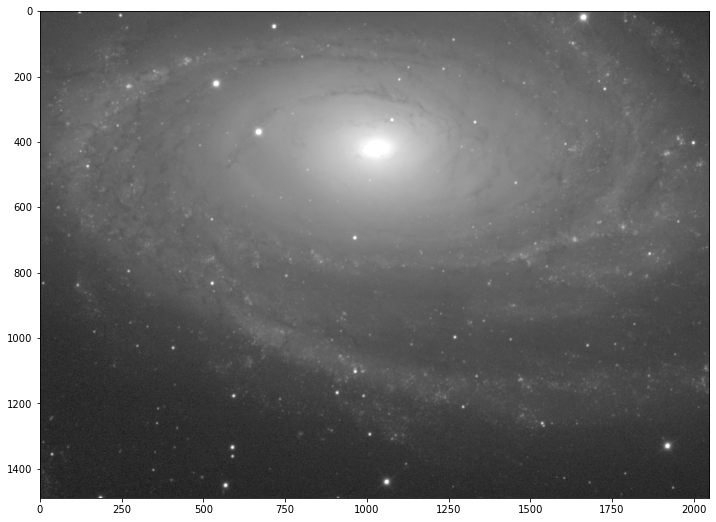

In [17]:
plt.imshow(sdss_g.data, cmap=plt.cm.gray, norm=sdss_g_norm)
fig = plt.gcf()
fig.set_size_inches((12,10))

In [18]:
import numpy as np
sdss_i.data.shape
color_ima = np.zeros((1489,2048,3), dtype=int)

In [19]:
color_ima[:,:,0] = sdss_g.data / sdss_g.data.max()*245
color_ima[:,:,1] = sdss_r.data / sdss_r.data.max()*245
color_ima[:,:,2] = sdss_i.data / sdss_i.data.max()*200


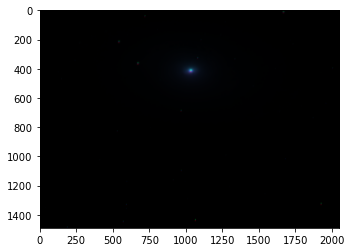

In [20]:
plt.imshow(color_ima)

### Another example:

In [ ]:
#import astropy.units as u
from astroquery.gaia import Gaia

result_simbad_m13 = Simbad.query_object("M 13")

ra_m13, dec_m13 = result_simbad_m13[0]["RA","DEC"]
coord_m13 = coords.SkyCoord(ra=ra_m13, dec=dec_m13, unit=(u.hour, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)
results_gaia = Gaia.query_object_async(coordinate=coord_m13, width=width, height=height)
results_gaia.pprint()

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [ ]:
print( results_gaia.colnames)

In [ ]:
plt.clf()
fig, axs = plt.subplots(1,2, figsize=(12,8), subplot_kw={'aspect':'equal'})
axs[0].plot( results_gaia['ra'], results_gaia['dec'], 'k,')
axs[1].plot( results_gaia['pmra'], results_gaia['pmdec'], 'k,')
axs[1].set_xlim(-100,100)
axs[1].set_ylim(-100,100)

In [ ]:

results_sdss_m13 = SDSS.query_region(coordinates=coord_m13, radius=60*u.arcmin, spectro=False, photoobj_fields=['ra','dec','u','g','r','i','z','type'])



In [ ]:
results_sdss_m13

In [ ]:
sdss_stars = results_sdss_m13[ results_sdss_m13['type'] == 6]
sdss_stars

In [ ]:
plt.clf()
fig, axs = plt.subplots(1,2, figsize=(12,8), sharex=True, subplot_kw={'aspect':'equal'})
axs[0].plot( results_sdss_m13['ra'], results_sdss_m13['dec'], 'k,')
axs[1].plot( results_gaia['ra'], results_gaia['dec'], 'k,')
#axs[1].set_xlim(-100,100)
#axs[1].set_ylim(-100,100)

In [ ]:
len(sdss_stars), len(results_gaia)

### Crossmatching

In [ ]:
coords_gaia = coords.SkyCoord( results_gaia['ra'], results_gaia['dec'], frame='icrs')
coords_sdss = coords.SkyCoord( sdss_stars['ra']*u.deg, sdss_stars['dec']*u.deg, frame='icrs')

In [ ]:
coords_sdss

In [ ]:
idx, d2d, d3d = coords_gaia.match_to_catalog_sky( coords_sdss)

In [ ]:
len(idx)

### How do we make sure we got the correct match between objects?

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.semilogy()
ax1.hist( d2d.to(u.arcsec).data, bins=np.linspace(0,6,61))
ax1.set_xlim(0,5)
ax1.set_ylabel("log(N)")

ax2.hist( d2d.to(u.arcsec).data, bins=np.linspace(0,6,61))
ax2.set_xlim(0,5)
ax2.set_ylim(0,200)
ax2.set_ylabel("N")

fig.text(0.5,0., "Separation [arcsec]", fontsize=14, ha='center')

In [ ]:
good_matches = d2d < 0.8*u.arcsec

In [ ]:
new_idx = idx[good_matches]
sdss_stars[new_idx]

In [ ]:
gaia_stars = results_gaia[good_matches]

In [ ]:
plt.clf()
fig, axs = plt.subplots(1,2, figsize=(12,8), sharex=True, subplot_kw={'aspect':'equal'})
axs[0].plot( sdss_stars['ra'], sdss_stars['dec'], 'k,')
axs[1].plot( gaia_stars['ra'], gaia_stars['dec'], 'k,')

In [ ]:
import astropy.table as tbl
data = tbl.hstack( [sdss_stars, gaia_stars])

data = data[(data['g'] > 0) & (data['r'] > 0)]

In [ ]:
print( data.colnames)

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot( data['g']-data['r'], data['g'], 'k,', ms=1)
ax.invert_yaxis()
ax.set_xlim(left=-2, right=6)

In [ ]:
plt.ylim?